In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df = pd.read_csv(r'C:\Users\abhis\Downloads\pythonProject1\majorProject\spam.csv' , encoding = 'latin-1')

In [9]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
## we perform these  steps 
#1. data cleaning 
#EDa 
# text preporcessing 
#model building 
# evaluation 
#website 
# Deployment 


In [12]:
# 1. Data cleaning 
df.drop( columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)


In [13]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
df.sample(3)

,v1,v2
3215,spam,URGENT! We are trying to contact U. Todays dra...
5018,ham,Great! How is the office today?
3489,ham,Huh but i got lesson at 4 lei n i was thinkin ...


In [15]:
#rename 
df.rename(columns = {'v1' :'target','v2':'text'}, inplace = True)

In [16]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df['target']=encoder.fit_transform(df['target'])

In [19]:
df   #0 = ham , 1 = spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [20]:
# check missing value 

df.isna().sum()

target    0
text      0
dtype: int64

In [21]:
df.duplicated().sum()

403

In [22]:
df.drop_duplicates(keep = 'first' , inplace = True)

In [23]:
df.shape

(5169, 2)

In [24]:
df.duplicated().sum()

0

# EDA

In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [27]:
import matplotlib.pyplot as plt 

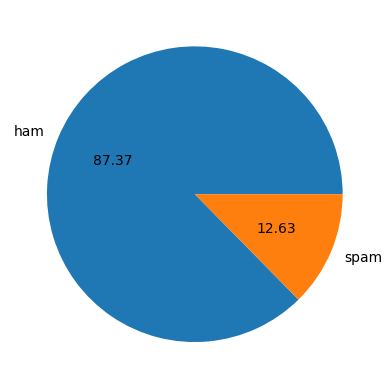

In [28]:
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] ,autopct = '%0.2f')
plt.show()

In [29]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming 'data' is your DataFrame containing the 'label' column
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='target')], axis=1)
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
9027,You have WON a guaranteed å£1000 cash or a å£2...,1
9028,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...,1
9029,it to 80488. Your 500 free text messages are v...,1
9030,from www.Applausestore.com MonthlySubscription...,1


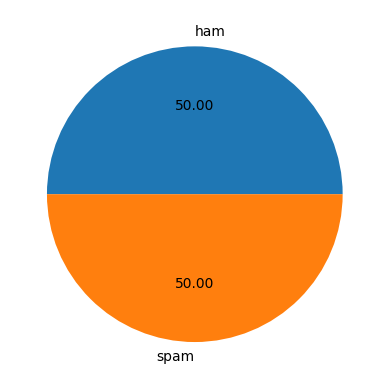

In [30]:
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] ,autopct = '%0.2f')
plt.show()

In [31]:
import nltk

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
df['num_character']=df['text'].apply(len)

In [34]:
df

,text,target,num_character
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...
9027,You have WON a guaranteed å£1000 cash or a å£2...,1,156
9028,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...,1,104
9029,it to 80488. Your 500 free text messages are v...,1,74
9030,from www.Applausestore.com MonthlySubscription...,1,96


In [35]:
df['num_word']=df['text'].apply( lambda x: nltk.word_tokenize(x)).apply(len)

In [36]:
df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)

In [37]:
df

,text,target,num_character,num_word,num_sentence
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...
9027,You have WON a guaranteed å£1000 cash or a å£2...,1,156,27,2
9028,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...,1,104,27,2
9029,it to 80488. Your 500 free text messages are v...,1,74,16,2
9030,from www.Applausestore.com MonthlySubscription...,1,96,14,1


In [38]:
df[['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,9032.000000,9032.000000,9032.000000
mean,104.059123,22.325731,2.395151
std,56.464940,11.969981,1.554912
min,2.000000,1.000000,1.000000
25%,49.000000,12.000000,1.000000
50%,114.000000,24.000000,2.000000
75%,152.000000,30.000000,3.000000
max,910.000000,220.000000,38.000000


In [39]:
df[df['target'] == 0 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
df[df['target'] == 1 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,137.658990,27.527679,2.970106
std,30.702368,7.097385,1.503408
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:
import seaborn as sns

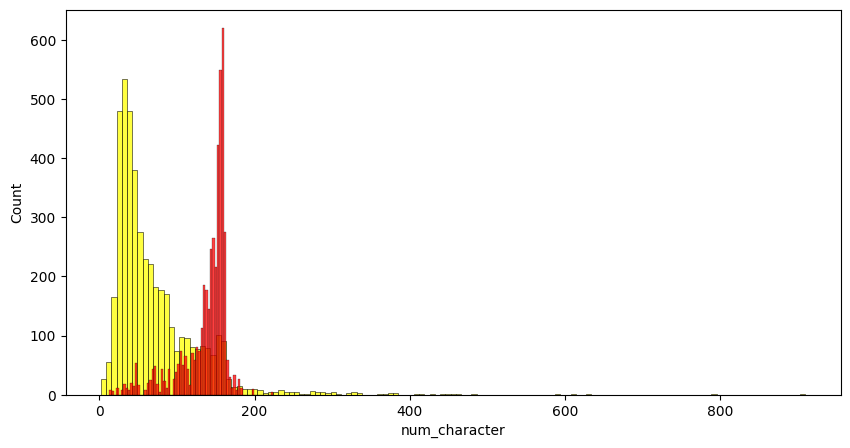

In [42]:

plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_character'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_character'] , color = 'red')
plt.show()

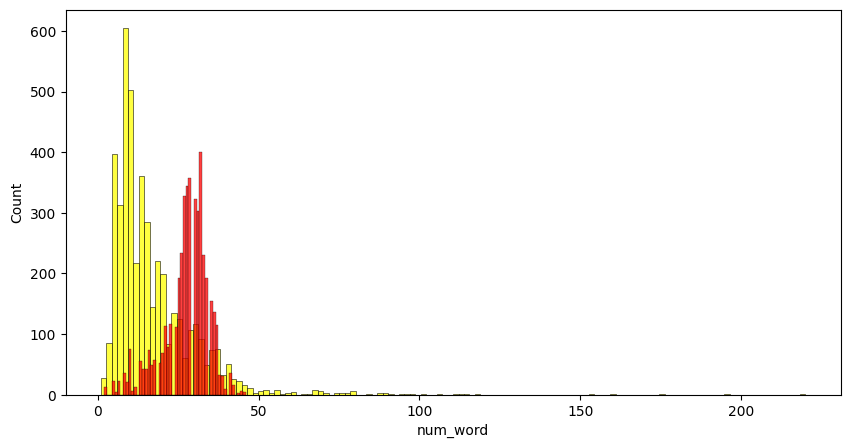

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_word'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_word'] , color = 'red')
plt.show()

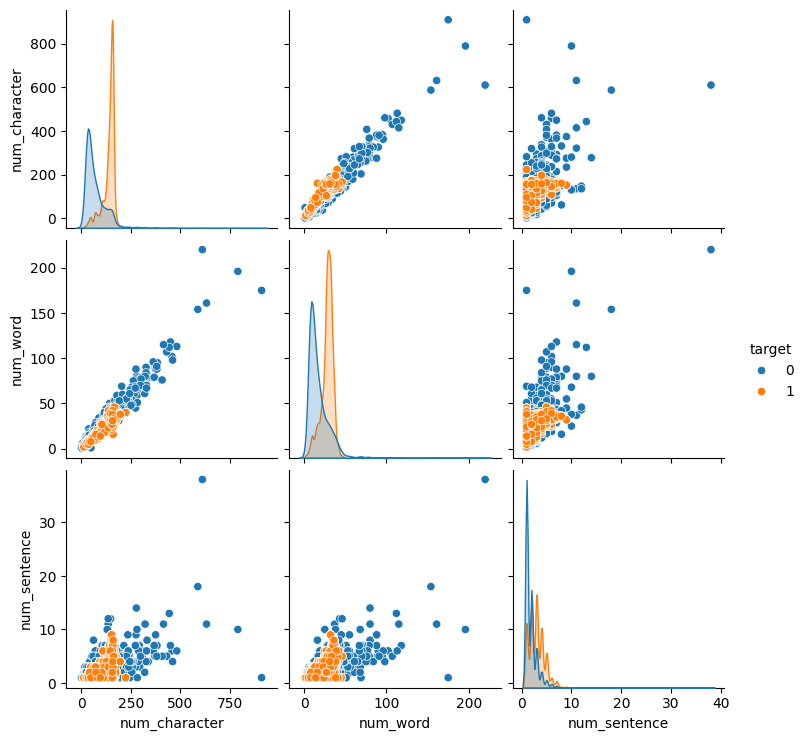

In [44]:
sns.pairplot(df,hue= ('target'))
plt.show()

<Axes: >

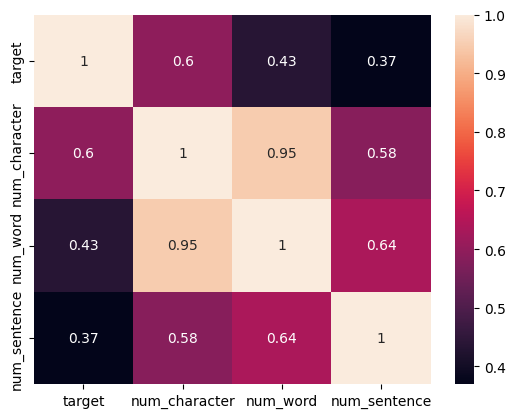

In [45]:
#to see correlation matrix 
df_numeric = df.select_dtypes(include=[np.number]) 
sns.heatmap(df_numeric.corr() , annot = True)

In [46]:
#data preprocess 
#lower case 
#tokenization 
#remove special character 
#remove stopwords 
#stemming 


In [47]:
import string 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    
    text= nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
            
    text = y[:]       
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [48]:
transform_text('HI Somu MY sely  Ak?!')

'hi somu seli ak'

In [49]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
ps.stem('danceing')

'danc'

In [52]:
df['transform_text']=df['text'].apply(transform_text)

In [53]:
df#

,text,target,num_character,num_word,num_sentence,transform_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
9027,You have WON a guaranteed å£1000 cash or a å£2...,1,156,27,2,guarante cash prize claim yr prize call custom...
9028,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...,1,104,27,2,1000 flirt txt girl bloke ur name age eg girl ...
9029,it to 80488. Your 500 free text messages are v...,1,74,16,2,500 free text messag valid 31 decemb 2005
9030,from www.Applausestore.com MonthlySubscription...,1,96,14,1,monthlysubscript csc web age16 2stop txt stop


In [54]:
#word cloud

from wordcloud import WordCloud
wc= WordCloud(width = 700 , height = 700 , min_font_size = 10 ,background_color = 'yellow')

In [55]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = ' '))

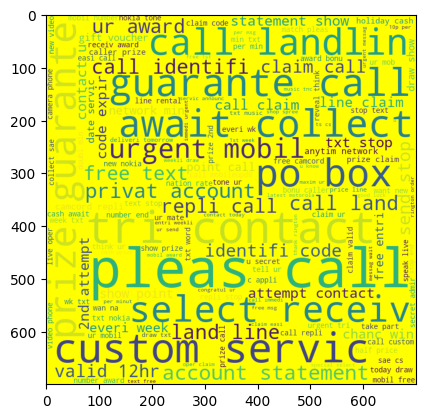

In [56]:
plt.imshow(spam_wc)

In [57]:
#word cloud for ham 

ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = ' '))

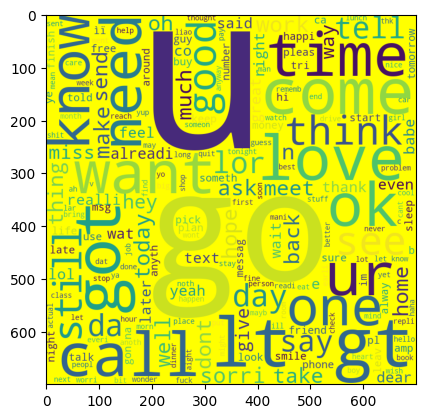

In [58]:
plt.imshow(ham_wc)

In [59]:
#top 50 words 

spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    
    

In [60]:
len(spam_corpus)

68848

In [61]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,2266
1,free,1325
2,2,1072
3,txt,994
4,ur,868
5,text,836
6,u,793
7,mobil,772
8,repli,746
9,stop,735


In [62]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    

In [63]:
len(ham_corpus)

35404

In [64]:
pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# Model Building 


In [65]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [66]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [67]:
X.shape

(9032, 6708)

In [68]:
y = df['target'].values

In [69]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 2 )

In [91]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [74]:
# gnb.fit(X_train, y_train)
# y_pred1 = gnb.predict(X_test)
# print(accuracy_score(y_test, y_pred1))
# print(confusion_matrix(y_test, y_pred1))
# print(precision_score(y_test, y_pred1))

In [75]:
# mnb.fit(X_train, y_train)
# y_pred2 = mnb.predict(X_test)
# print(accuracy_score(y_test, y_pred2))
# print(confusion_matrix(y_test, y_pred2))
# print(precision_score(y_test, y_pred2))

In [94]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9845047039291643
[[906   0]
 [ 28 873]]
1.0


Confusion Matrix:
[[906   0]
 [ 28 873]]


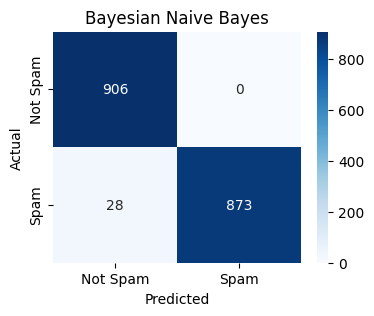

In [100]:
conf_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Bayesian Naive Bayes')
plt.show()

In [95]:
lr.fit(X_train, y_train)
y_pred4 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(precision_score(y_test, y_pred4))

0.987825124515772
[[898   8]
 [ 14 887]]
0.9910614525139665


Confusion Matrix:
[[898   8]
 [ 14 887]]


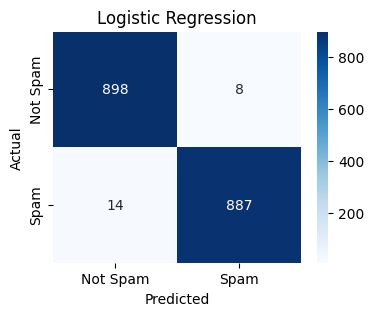

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression')
plt.show()

In [98]:
dt.fit(X_train, y_train)
y_pred5 = dt.predict(X_test)
print(accuracy_score(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))
print(precision_score(y_test, y_pred5))

0.9717764250138351
[[855  51]
 [  0 901]]
0.9464285714285714


Confusion Matrix:
[[855  51]
 [  0 901]]


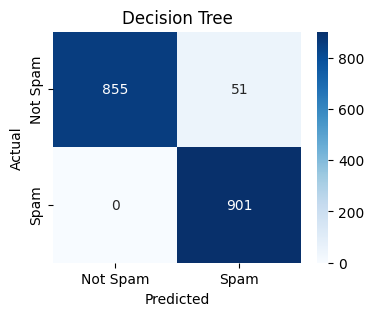

In [99]:
conf_matrix = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree')
plt.show()

In [86]:
rf.fit(X_train, y_train)
y_pred6 = rf.predict(X_test)
print(accuracy_score(y_test, y_pred6))
print(confusion_matrix(y_test, y_pred6))
print(precision_score(y_test, y_pred6))


0.9994465965688988
[[905   1]
 [  0 901]]
0.9988913525498891


Confusion Matrix:
[[905   1]
 [  0 901]]


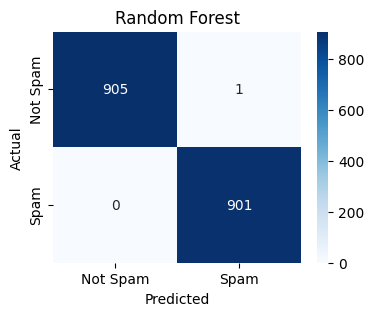

In [89]:
conf_matrix = confusion_matrix(y_test, y_pred6)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest')
plt.show()

In [80]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rf,open('model.pkl','wb'))

In [81]:
df['transform_text'][4532]

'ye babi need stretch open pussi'

In [82]:
df.sample(10)


,text,target,num_character,num_word,num_sentence,transform_text
268,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...,1,155,30,4,hmv bonu special 500 pound genuin hmv voucher ...
2828,"Don't worry, * is easy once have ingredients!",0,45,11,1,worri easi ingredi
866,Gibbs unsold.mike hussey,0,24,3,1,gibb hussey
909,money!!! you r a lucky winner ! 2 claim your p...,1,140,29,4,money r lucki winner 2 claim prize text money ...
8880,Today's Offer! Claim ur å£150 worth of discoun...,1,160,35,7,today offer claim ur worth discount voucher te...
2567,URGENT! We are trying to contact U. Todays dra...,1,158,32,5,urgent tri contact today draw show prize guara...
725,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...,1,149,34,4,hi custom loyalti offer new nokia6650 mobil tx...
7388,from www.Applausestore.com MonthlySubscription...,1,96,14,1,monthlysubscript csc web age16 2stop txt stop
1335,We're finally ready fyi,0,23,5,1,final readi fyi
5589,How come it takes so little time for a child w...,1,124,28,1,come take littl time child afraid dark becom t...
